<a href="https://colab.research.google.com/github/frlps/IE708A_FEEC_UNICAMP_S12021/blob/main/Prova_IE708A_S12021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1. 1 Medidas de Campo (Probability Density Function – PDF, e Cumulative Distribution Function – CDF). 
Em um cenário de desvanecimento, foram feitas medidas de campo com o objetivo de se caracterizar o ambiente em termos de suas estatísticas. Os dados coletados apresentam-se na tabela seguinte:

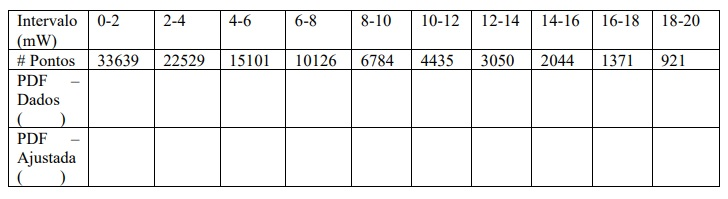

## a. A partir do histograma dos dados, sugira uma PDF dentre aquelas conhecidas para possível ajuste aos dados.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IntervaloPot = ['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20']
Intervalo = [0,2,4,6,8,10,12,14,16,18]
IntervaloMedia = [1,3,5,7,9,11,13,15,17,19]
Pontos = [33639,22529,15101,10126,6784,4435,3050,2044,1371,921]

In [4]:
len(IntervaloPot),len(IntervaloMedia), len(Pontos)

(10, 10, 10)

In [5]:
dfQuestao1 = pd.DataFrame(list(zip(Intervalo, IntervaloMedia, Pontos)), columns = ['Intervalo','Media_Intervalo', 'Frequencia'], index=IntervaloPot)
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia
0-2,0,1,33639
2-4,2,3,22529
4-6,4,5,15101
6-8,6,7,10126
8-10,8,9,6784
10-12,10,11,4435
12-14,12,13,3050
14-16,14,15,2044
16-18,16,17,1371
18-20,18,19,921


In [6]:
Pontos_Totais = dfQuestao1.Frequencia.sum()
Pontos_Totais

100000

In [7]:
sns.set()

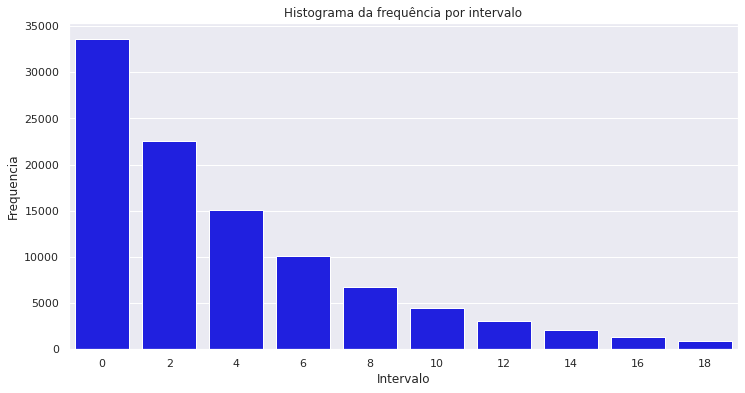

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(data=dfQuestao1, x='Intervalo', y='Frequencia', color="blue")
plt.title('Histograma da frequência por intervalo')
plt.show()

Pelo histograma acima podemos inferir que a PDF 𝑓W(𝑤) da potência do sinal recebido em um ambiente sem fio pode ser modelada por uma exponencial negativa tal que: 

$$𝑓_W(𝑤) = \lambda e^{-(\lambda w)}$$

$$𝑓_W(𝑤) = \frac {1}{W_m} e^{-(\frac{𝑤}{W_m})}$$ 

Onde $W_m$ é a potência média. 

## b. Ajuste a PDF sugerida aos dados. Uma maneira de fazer isso é determinar os parâmetros da PDF-alvo a partir dos dados. Plote e contraste as PDFs teórica e empírica.

Para tanto devemos calcular a média, que para o caso discreto é $Wm = \frac {1}{10^5} \sum x_i freq_i = E(w)$

Portanto:

In [9]:
Wm = 0
for i in range(0,len(Pontos)):
  # print(Pontos[i],IntervaloMedia[i])
  Wm += Pontos[i]*IntervaloMedia[i]
Wm *= (1/10**5)
Wm = round(Wm,4)
print(f'A pontencia média é {Wm} mW')

A pontencia média é 4.6857 mW


Portanto, a PDF 𝑓W(𝑤) para a distribuição apresentada é:  $$𝑓_W(𝑤) = \frac {1}{4.6857} e^{-(\frac{𝑤}{4.6857})}$$ 

In [10]:
dfQuestao1['PDF_Ajustada'] = (1/Wm)*np.exp(-(dfQuestao1.Media_Intervalo)*(1/Wm))
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia,PDF_Ajustada
0-2,0,1,33639,0.172401
2-4,2,3,22529,0.112505
4-6,4,5,15101,0.073418
6-8,6,7,10126,0.047910
8-10,8,9,6784,0.031265
10-12,10,11,4435,0.020403
12-14,12,13,3050,0.013314
14-16,14,15,2044,0.008689
16-18,16,17,1371,0.005670
18-20,18,19,921,0.003700


Para a PDF teórica, temos que: $f_w(w) = \frac{dF_w(w)}{dw}$

Fazendo a derivada: $f_w(w) = \frac{F_w(w+\frac{\Delta w}{2})+F_w(w-\frac{\Delta w}{2})}{\Delta w}$

Portanto: $f_w(w) = \frac{frequência}{intervalo}$

E a frequência: $ \frac{Pontos}{Total de Pontos}$

In [11]:
fw_teorico = []
for i in range(0,len(Pontos)):
  fw_teorico.append((1/2)*(Pontos[i]/Pontos_Totais))

fw_teorico

[0.168195,
 0.112645,
 0.075505,
 0.05063,
 0.03392,
 0.022175,
 0.01525,
 0.01022,
 0.006855,
 0.004605]

In [12]:
dfQuestao1['PDF_Dados'] = fw_teorico
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia,PDF_Ajustada,PDF_Dados
0-2,0,1,33639,0.172401,0.168195
2-4,2,3,22529,0.112505,0.112645
4-6,4,5,15101,0.073418,0.075505
6-8,6,7,10126,0.047910,0.050630
8-10,8,9,6784,0.031265,0.033920
10-12,10,11,4435,0.020403,0.022175
12-14,12,13,3050,0.013314,0.015250
14-16,14,15,2044,0.008689,0.010220
16-18,16,17,1371,0.005670,0.006855
18-20,18,19,921,0.003700,0.004605


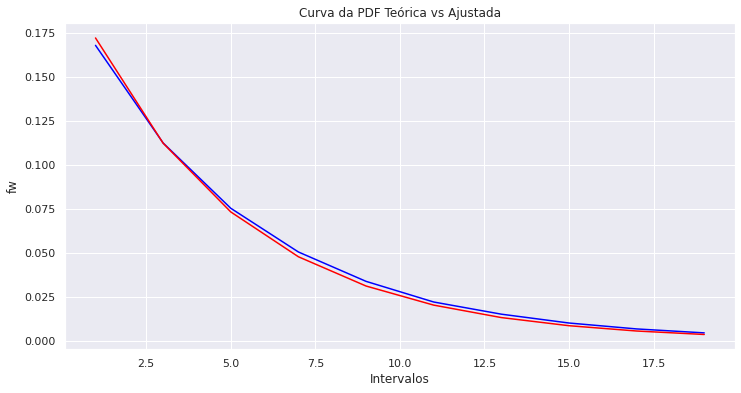

In [13]:
plt.figure(figsize=(12,6))
plt.plot(dfQuestao1['Media_Intervalo'],dfQuestao1['PDF_Dados'], color='Blue')
plt.plot(dfQuestao1['Media_Intervalo'],dfQuestao1['PDF_Ajustada'], color='Red')
plt.title('Curva da PDF Teórica vs Ajustada')
plt.ylabel('fw')
plt.xlabel('Intervalos')
plt.show()

## c. Determine o desvio padrão a partir dos dados e a partir da PDF ajustada e compare ambos.

Para a distribuição ajustada:

Sabemos que: $$ DesvioPadrao = \sqrt{Variancia} $$


$$Variancia = E^2(x)$$ 

Portanto: $$ DesvioPadrao = \sqrt{E(x)^2} = E(x) = Wm $$

In [14]:
desv_Pad_Ajustada = Wm
desv_Pad_Ajustada

4.6857

Para a distribuição a partir dos dados:

Sabemos que: $$ DesvioPadrao = \sqrt{Variancia} $$


e que: $$ Variancia =  \sigma^2 = E(x^2) - E^2(x)$$


Portanto: $$ DesvioPadrao = \sqrt{E(x^2)-E^2(x)}$$

In [15]:
E_w2 = 0
for i in range(0,len(Pontos)):
  E_w2 += ((IntervaloMedia[i]**2)*(Pontos[i])) 

E_w2=E_w2*(1/10**5)
E_w2 = round(E_w2,6)
E_w2

39.00288

In [16]:
E2_w = Wm**2 
E2_w

21.95578449

In [17]:
Variancia_Dados=E_w2-E2_w
Variancia_Dados

17.04709551

In [18]:
Desvio_Pad_Dados = round(np.sqrt(Variancia_Dados),4)
Desvio_Pad_Dados

4.1288

In [19]:
print(f'O desvio padrão da pdf ajustada é {desv_Pad_Ajustada}, e o desvio padrão a partir dos dados é {Desvio_Pad_Dados}')

O desvio padrão da pdf ajustada é 4.6857, e o desvio padrão a partir dos dados é 4.1288


## d. Preencha as duas últimas linhas da tabela com o valor da PDF em cada ponto a partir dos dados e o valor da PDF em cada ponto a partir do ajuste. Não se esqueça de também preencher o espaço entre parênteses com a unidade correspondente (se houver)

In [20]:
dfQuestao1_d = dfQuestao1.drop(['Intervalo','Media_Intervalo'], axis=1)
dfQuestao1_d.rename(columns={'PDF_Ajustada':'PDF_Ajustada(1/mW)','PDF_Dados':'PDF_Dados(1/mW)'}, inplace=True)
dfQuestao1_d

,Frequencia,PDF_Ajustada(1/mW),PDF_Dados(1/mW)
0-2,33639,0.172401,0.168195
2-4,22529,0.112505,0.112645
4-6,15101,0.073418,0.075505
6-8,10126,0.047910,0.050630
8-10,6784,0.031265,0.033920
10-12,4435,0.020403,0.022175
12-14,3050,0.013314,0.015250
14-16,2044,0.008689,0.010220
16-18,1371,0.005670,0.006855
18-20,921,0.003700,0.004605


## e. Determine a CDF teórica e plote-a contrastando-a com a empírica.

In [21]:
cdf_empirica = []
soma = 0

for i in range (0,10):
  soma += dfQuestao1.PDF_Ajustada[i]*2 # 2 que é o delta w
  cdf_empirica.append(soma)

cdf_empirica

[0.34480252339362166,
 0.5698117227921629,
 0.7166469005503459,
 0.812467735809124,
 0.8749979319778567,
 0.9158035190126659,
 0.9424321886039504,
 0.9598093689296964,
 0.971149266893368,
 0.9785493907003335]

In [22]:
dfQuestao1_CDF = dfQuestao1.drop(['Media_Intervalo','Frequencia'], axis=1)
dfQuestao1_CDF['CDF_Empirica'] = cdf_empirica
dfQuestao1_CDF

,Intervalo,PDF_Ajustada,PDF_Dados,CDF_Empirica
0-2,0,0.172401,0.168195,0.344803
2-4,2,0.112505,0.112645,0.569812
4-6,4,0.073418,0.075505,0.716647
6-8,6,0.047910,0.050630,0.812468
8-10,8,0.031265,0.033920,0.874998
10-12,10,0.020403,0.022175,0.915804
12-14,12,0.013314,0.015250,0.942432
14-16,14,0.008689,0.010220,0.959809
16-18,16,0.005670,0.006855,0.971149
18-20,18,0.003700,0.004605,0.978549


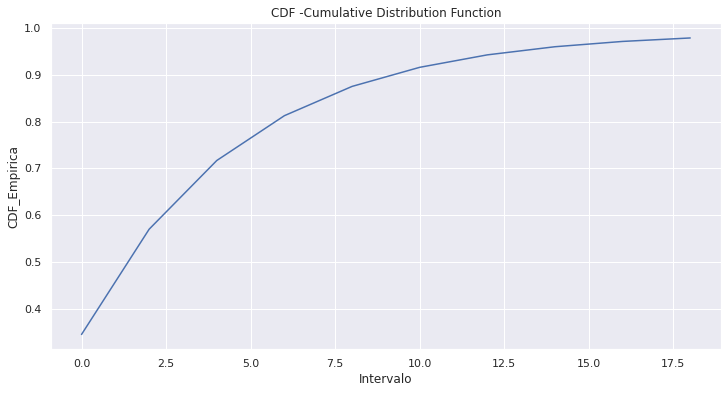

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Empirica")
plt.title('CDF -Cumulative Distribution Function')
plt.show()

In [24]:
lambda1 = 1/Wm
lambda1

0.21341528480269759

In [25]:
def cdf_teorica_function(ponto_medio,lambda1):
  Fw = 1-np.exp(-(lambda1*ponto_medio))
  return Fw

In [26]:
cdf_teorica = []
for i in IntervaloMedia:
  cdf_teorica.append(cdf_teorica_function(i,lambda1))
cdf_teorica

[0.19217940806725353,
 0.47283719718912776,
 0.6559872037892411,
 0.7755061561139716,
 0.8535011299060847,
 0.9043986304154973,
 0.937613021448059,
 0.959287873073826,
 0.9734323200558118,
 0.982662619938851]

In [27]:
dfQuestao1_CDF['CDF_Teorica'] = cdf_teorica
dfQuestao1_CDF

,Intervalo,PDF_Ajustada,PDF_Dados,CDF_Empirica,CDF_Teorica
0-2,0,0.172401,0.168195,0.344803,0.192179
2-4,2,0.112505,0.112645,0.569812,0.472837
4-6,4,0.073418,0.075505,0.716647,0.655987
6-8,6,0.047910,0.050630,0.812468,0.775506
8-10,8,0.031265,0.033920,0.874998,0.853501
10-12,10,0.020403,0.022175,0.915804,0.904399
12-14,12,0.013314,0.015250,0.942432,0.937613
14-16,14,0.008689,0.010220,0.959809,0.959288
16-18,16,0.005670,0.006855,0.971149,0.973432
18-20,18,0.003700,0.004605,0.978549,0.982663


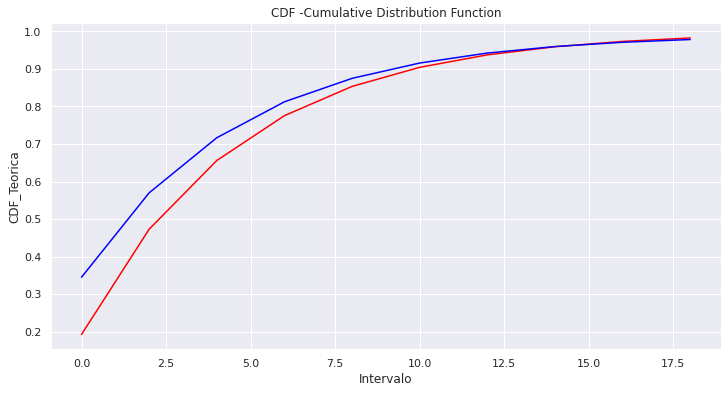

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Teorica",color='red')
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Empirica", color='blue')
plt.title('CDF -Cumulative Distribution Function')
plt.show()

## f. Determine a PDF teórica da envoltória correspondente.

A PDF da envoltóiria, 𝑓W(𝑤) para a distribuição apresentada é:  $$𝑓_W(𝑤) = \frac {1}{4.6857} e^{-(\frac{𝑤}{4.6857})}$$  para $$ ,w >=0 $$

ou

$$𝑓_W(𝑤) = 0.2134 * e^{-(0.2134 * w)}$$  para $$ ,w >=0 $$

#  2. 2 Interferência Co-Canal (Carrier-to-Interference-plus-Noise Ratio – CINR).
Considere um sistema com padrão quadrangular e a primeira camada de células 
interferentes. Suponha que a **potência do ruído seja uma proporção 10% de um sinal interferente de uplink da primeira camada de células interferentes**. Considere um sistema operando com: 

* (i) antenas transmissora e receptora de 4 m e 1,5 m, respectivamente; 
* (ii)frequência de 1,8 GHz; 
* (iii) padrão de reuso de cinco (cruciforme); 
* (iv) distâncias entre ERBs de 200 m; 
* (v) largura de ruas de 15 m.


In [29]:
ht = 4 #Altura da entena de transmissão

In [30]:
hr = 1.5 #Altura da antena de recepção (móvel - altura do usuário)

In [31]:
R = 200 #Metros

## a. Determine a parcela relativa ao ruído.

 Sabendo-se que a C/I do uplink para uma microcélula no primeiro "layer" (L=1) é:

 $$ \frac{C}{I} =  \frac{n_1^2 [1+(n_1k)^2]}{4r^2 [1+(rk)^2]}$$

e que a potência do ruído seja uma proporção 10% de um sinal interferente de uplink da primeira camada de células interferentes, temos que a parcela referente ao ruído é de:

 $$I_{ruido} = \frac{1}{10} 4r^2 [1+(rk)^2]$$

In [32]:
def interf_Noise (r,k):
  iNoise = (1/10)*4*(r**2)*(1+(r*k)**2)
  return iNoise

## b. Determine a CINR para o usuário a 7,5 m da ERB (imediatamente antes de adentrar a quadra) supondo todos os interferentes ativos.

*D.4 Prime Noncollinear Type
In the prime noncollinear, d = 2N. We define p as a parameter that designates the prime number immediately prior to N, and that satisfies the relation
p = i 2 + j 2. The only exception to this is when N = 5, for which p = 3.

* Uplink
n1+3(k−1) = p + 2N (k − 1)
n2+3(k−1) = 2N − p + 2N (k − 1)
n3+3(k−1) = 2Nk − 1

* **Downlink
nk = 2Nk negrito**

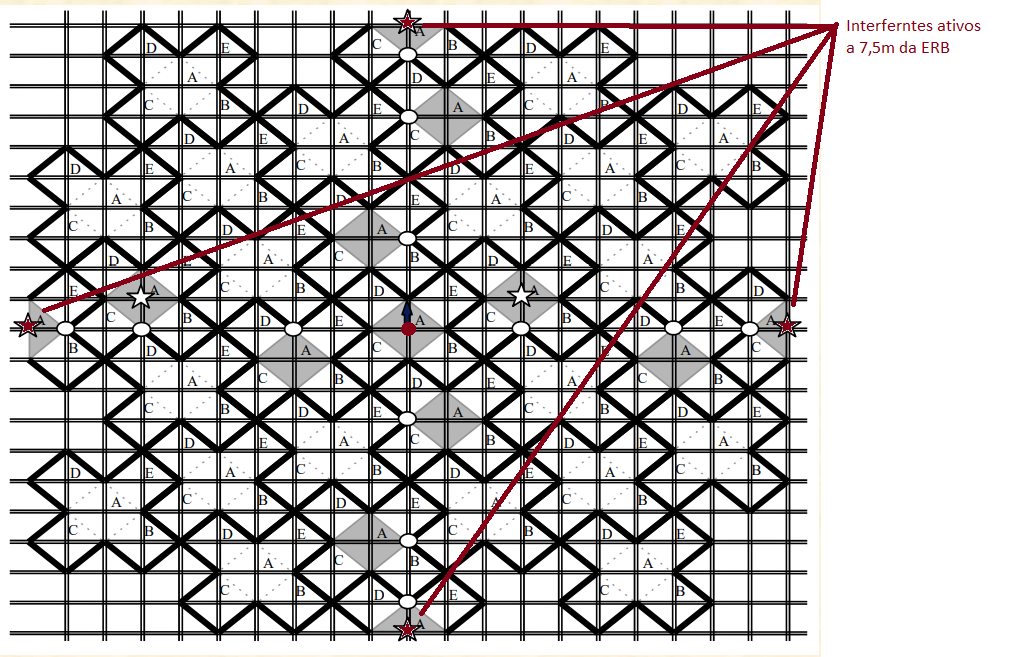

Dado que a rua tem 15m de largura, o usuário continua recebendo ***'LOS'*** das estações na 'linha de visada' tanto na vertical, como na horizontal, conforme desenho acima, onde a ERB está no centro e as demais estão nas estrelas vermelhas identificadas próximas às restas da figura.

 Assim sendo:


 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{\sum_{L=1}^{inf}[(n_L+r)^{-2}[1+(n_L+r)^2k^2]^{-1}+(n_L-r)^{-2}[1+(n_L-r)^2k^2]^{-1}+2(n_L^2+r^2)^{-1}[1+(n_L^2+r^2)k^2]^{-1}]}$$



In [33]:
def carrier_signal (r,k):
  c_signal = (r**(-2))*((1+(r*k)**2)**(-1))
  return c_signal

In [34]:
def interf_signal_vUp (r,k,n):
  i_signal_vup = ((n+r)**(-2))*((1+((n+r)**2)*(k**2))**(-1))
  return i_signal_vup

In [35]:
def interf_signal_vdown (r,k,n):
  i_signal_vdown = ((n-r)**(-2))*((1+((n-r)**2)*(k**2))**(-1))
  return i_signal_vdown

In [36]:
def interf_signal_hor (r,k,n):
  i_signal_hor = 2*(n**2+r**2)*((1+(n**2+r**2)*(k**2))**(-1))
  return i_signal_hor

In [37]:
db = (4*ht*hr)/(1/6)
db

144.0

In [38]:
lambdaOnda = round(3/18,4)
lambdaOnda

0.1667

In [39]:
k= round(R/db,4)
k

1.3889

In [40]:
n1 =2*5*k 
n1

13.889

Para L=1

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{[(n_1+r)^{-2}[1+(n_1+r)^2k^2]^{-1}+(n_1-r)^{-2}[1+(n_1-r)^2k^2]^{-1}+2(n_1^2+r^2)^{-1}[1+(n_1^2+r^2)k^2]^{-1}]}$$

In [41]:
d1 = 7.5

In [42]:
r1 = d1/R
r1 

0.0375

In [43]:
CNIR1 = carrier_signal(r1,k)/(interf_Noise(r1,k)+interf_signal_vUp(r1,k,n1)+interf_signal_vdown(r1,k,n1)+interf_signal_hor(r1,k,n1))
CNIR1

685.4722991736753

In [44]:
CNIR1LOG = 10*np.log(CNIR1)
print(f'Carrier / interference factor :{round(CNIR1LOG,4)} dB')

Carrier / interference factor :65.3011 dB


## c. Idem a questão 'b', para o usuário a 50 m da ERB.

O usuário atravessou a rua e agora encontra-se entre os blocos. Isso faz com que o ***'LOS'*** das estações na 'linha de visada' ***vertical permaneçem***, mas da horizontal fiquem bloqueadas pelos blocos da quadra, conforme desenho acima, onde a ERB está no centro e as demais estão nas estrelas vermelhas identificadas próximas às arestas da figura.

 Assim sendo:

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{\sum_{L=1}^{inf}[(n_L+r)^{-2}[1+(n_L+r)^2k^2]^{-1}+(n_L-r)^{-2}[1+(n_L-r)^2k^2]^{-1}]}$$

In [45]:
d2 = 50

In [46]:
r2 = d2/R
r2 

0.25

Para L=1

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{[(n_1+r)^{-2}[1+(n_1+r)^2k^2]^{-1}+(n_1-r)^{-2}[1+(n_1-r)^2k^2]^{-1}}$$

In [47]:
CNIR2 = carrier_signal(r2,k)/(interf_Noise(r2,k)+interf_signal_vUp(r2,k,n1)+interf_signal_vdown(r2,k,n1))
CNIR2

509.18284453760197

In [48]:
CNIR2LOG = 10*np.log(CNIR2)
print(f'Carrier / interference factor :{round(CNIR2LOG,4)} dB')

Carrier / interference factor :62.3281 dB


## d. Idem a questão 'b', para o usuário a 100 m da ERB.

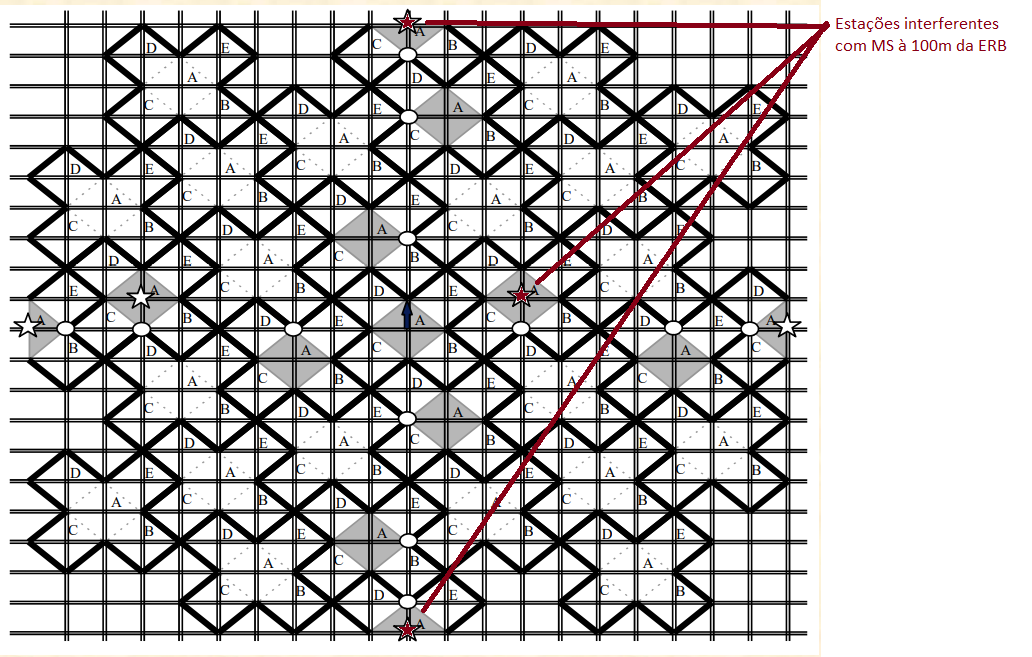

O usuário atravessou os blocos. Isso faz com que o ***'LOS'*** das estações na 'linha de visada' ***vertical permaneçem***, e apareçam novos da horizontal, conforme desenho acima, onde a ERB está no centro e as demais estão nas estrelas vermelhas identificadas próximas às arestas e próximas do centro da figura.

 Assim sendo:

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{\sum_{L=1}^{inf}[(n_L+r)^{-2}[1+(n_L+r)^2k^2]^{-1}+(n_L-r)^{-2}[1+(n_L-r)^2k^2]^{-1}+(n_{lc}^2+r_c^2)^{-1}[1+(n_{lc}^2+r_c^2)k^2]^{-1}]}$$

Para L=1

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{[(n_1+r)^{-2}[1+(n_1+r)^2k^2]^{-1}+(n_1-r)^{-2}[1+(n_1-r)^2k^2]^{-1}+(n_{1m}^2+r_m^2)^{-1}[1+(n_{1m}^2+r_m^2)k^2]^{-1}]}$$

In [49]:
def interf_signal_hor_border (r,k,n,p):
  r_c = 1-r
  n_c = p+2*n*(k-1)
  i_signal_hor_border = ((n_c**2+r_c**2)**(-1))*(1+((n_c**2+r_c**2)*(k**2))**(-1))
  return i_signal_hor_border

In [50]:
d3 = 100

In [51]:
r3 = d3/R
r3 

0.5

* $$nk = 2Nk$$
* $$n_{1+2(k−1)} = p + 2N (k − 1)$$
* $$n_{2+2(k−1)} = 2N − p + 2N (k − 1)$$

In [52]:
p=3

In [53]:
CNIR3 = carrier_signal(r3,k)/(interf_Noise(r3,k)+interf_signal_vUp(r3,k,n1)+interf_signal_vdown(r3,k,n1)+interf_signal_hor_border (r3,k,n1,p))
CNIR3

17.579136130339997

In [78]:
interf_signal_vUp(r3,k,n1)

1.206284016456628e-05

In [79]:
interf_signal_vdown(r3,k,n1)

1.6084642634635627e-05

In [54]:
CNIR3LOG = 10*np.log(CNIR3)
print(f'Carrier / interference factor :{round(CNIR3LOG,4)} dB')

Carrier / interference factor :28.6671 dB


## e. Determine a CINR a 100 m da ERB para: 
 * (i) nenhum canal interferente ativo; 
 * (ii)para as combinações possíveis de um interferente ativo individualmente;   
 * (iii) para as combinações possíveis de dois interferentes ativos simultaneamente

### (i) nenhum canal interferente ativo;

In [87]:
CNIR_0_Interf_Noise = carrier_signal(r3,k)/(interf_Noise(r3,k))
CNIR_0_Interf_Noise

18.205840899544004

### (ii)para as combinações possíveis de um interferente ativo individualmente;   

In [80]:
CNIR_1_Interf_UP = carrier_signal(r3,k)/(interf_Noise(r3,k)+interf_signal_vUp(r3,k,n1))
CNIR_1_Interf_UP

18.204359403997348

In [81]:
CNIR_1_Interf_Down = carrier_signal(r3,k)/(interf_Noise(r3,k)+interf_signal_vdown(r3,k,n1))
CNIR_1_Interf_Down

18.20386552064324

In [82]:
CNIR_1_Interf_Horiz = carrier_signal(r3,k)/(interf_Noise(r3,k)+interf_signal_hor_border (r3,k,n1,p))
CNIR_1_Interf_Horiz

17.582360010523388

In [86]:
CNIR_1_Interf_m = (CNIR_1_Interf_UP+CNIR_1_Interf_Down+CNIR_1_Interf_Horiz)/3
CNIR_1_Interf_m

17.99686164505466

### (iii) para as combinações possíveis de dois interferentes ativos simultaneamente

In [59]:
CNIR_2_Interf_UpDown = carrier_signal(r3,k)/(interf_Noise(r3,k)+interf_signal_vUp(r3,k,n1)+interf_signal_vdown(r3,k,n1))
CNIR_2_Interf_UpDown

18.202384346557952

In [60]:
CNIR_2_Interf_UpHor = carrier_signal(r3,k)/(interf_Noise(r3,k)+interf_signal_vUp(r3,k,n1)+interf_signal_hor_border (r3,k,n1,p))
CNIR_2_Interf_UpHor


17.580978244813593

In [61]:
CNIR_2_Interf_DownHor = carrier_signal(r3,k)/(interf_Noise(r3,k)+interf_signal_vdown(r3,k,n1)+interf_signal_hor_border (r3,k,n1,p))
CNIR_2_Interf_DownHor

17.580517606493977

In [85]:
CNIR_2_Interf_m = (CNIR_2_Interf_UpDown+CNIR_2_Interf_UpHor+CNIR_2_Interf_DownHor)/3
CNIR_2_Interf_m

17.787960065955172

### TABELA

In [89]:
listCNIR = [[0,CNIR_0_Interf_Noise,10*np.log(CNIR_0_Interf_Noise)],[1,CNIR_1_m,10*np.log(CNIR_1_m)],[2,CNIR_2_m,10*np.log(CNIR_2_m)],[3,CNIR3,CNIR3LOG]]
listCNIR

[[0, 18.205840899544004, 29.01742471142573],
 [1, 17.99686164505466, 28.901973896423854],
 [2, 17.787960065955172, 28.785218276467827],
 [3, 17.579136130339997, 28.667127517060816]]

In [92]:
dfCINR = pd.DataFrame(data=listCNIR, index=[0,1,2,3], columns=['i','CINRi','CINRi_dB'])
dfCINR

,i,CINRi,CINRi_dB
0,0,18.205841,29.017425
1,1,17.996862,28.901974
2,2,17.787960,28.785218
3,3,17.579136,28.667128


## f. Considere cada célula com 18 canais e operando com uma probabilidade de bloqueio de 5%. Determine a taxa de ocupação média de cada canal (i.e., o tráfego escoado por canal).

In [63]:
Bloq=5/100
Bloq

0.05

In [64]:
Ncanais=18

In [65]:
#DA TABELA
trafego_Erlang_B = 13.4 

$$Taxa_{Ocup} = \frac{A(1-Bloq)}{N_{canais}}$$ 

In [66]:
T_Ocup = (trafego_Erlang_B*(1-Bloq))/Ncanais
print(f'A taxa de ocupação por canal é de: {round(T_Ocup,4)}')

A taxa de ocupação por canal é de: 0.7072


## g. Supondo que os canais interferentes estarão ativos de acordo com a sua taxa de ocupação, determine a CINR média a 100 m da ERB.


$$Pi = (_i^3) T_{Ocup}^i*(1-T_{Ocup})^{3-i}$$

e

$$ CNIR_{media} = \sum_{i=0}^3 CNIR_i*P_i$$

In [67]:
p0 = (1*T_Ocup**0)*((1-T_Ocup)**(3-0))
p0

0.02509656772976681

In [73]:
p1 = (3*T_Ocup**1)*((1-T_Ocup)**(3-1))
p1

0.1818667782921811

In [74]:
p2 = (3*T_Ocup**2)*((1-T_Ocup)**(3-2))
p2

0.4393100735596708

In [75]:
p3 = (1*T_Ocup**3)*((1-T_Ocup)**(3-3))
p3

0.3537265804183813

In [93]:
listPes = [p0,p1,p2,p3]

In [94]:
dfCINR['Pi'] = listPes
dfCINR

,i,CINRi,CINRi_dB,Pi
0,0,18.205841,29.017425,0.025097
1,1,17.996862,28.901974,0.181867
2,2,17.787960,28.785218,0.439310
3,3,17.579136,28.667128,0.353727


In [95]:
dfCINR['CINRi*Pi'] = dfCINR.CINRi*dfCINR.Pi
dfCINR

,i,CINRi,CINRi_dB,Pi,CINRi*Pi
0,0,18.205841,29.017425,0.025097,0.456904
1,1,17.996862,28.901974,0.181867,3.273031
2,2,17.787960,28.785218,0.439310,7.814430
3,3,17.579136,28.667128,0.353727,6.218208


In [96]:
CINR_medio = dfCINR['CINRi*Pi'].sum()
CINR_medio

17.762573121114613